In [2]:
# !pip install --upgrade tensorflow-hub
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

## transfer learning with all layers , "classification"

https://tfhub.dev/<br>
online imported model from this webiste

## model name "MobileNet-EdgeTPU-v2 "<br>
without feature vector

In [3]:
IMAGE_SHAPE = (224, 224)    # this model built on this shape that,s why i choosed this model
classifier =Sequential([
    hub.KerasLayer('https://tfhub.dev/google/edgetpu/vision/mobilenet-edgetpu-v2/l/1',input_shape = IMAGE_SHAPE+(3,))
])


## second model " MobileNet-EdgeTPU-v2-feture-vector "
https://tfhub.dev/google/edgetpu/vision/mobilenet-edgetpu-v2-feature-vector/l/2

In [4]:
image_shape = (224,224)
classifier_with_feature_vector = Sequential([
     hub.KerasLayer('https://tfhub.dev/google/edgetpu/vision/mobilenet-edgetpu-v2-feature-vector/l/2',trainable=False,input_shape=image_shape+(3,))
])

In [11]:
img = Image.open('gold_fish.jpg')
img = img.resize((224,224))

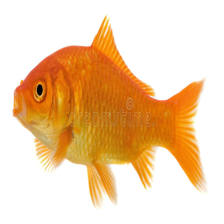

In [12]:
img
# this is my image first i will chek my model

In [14]:
gold_fish = np.array(img)/255
gold_fish

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [15]:
gold_fish.shape

(224, 224, 3)

In [18]:
gold_fish[np.newaxis, ...].shape    # trick
# add one more dimension to this age

(1, 224, 224, 3)

In [19]:
result = classifier.predict(gold_fish[np.newaxis, ...])       # predict the output
result.shape

1/1 [==============================] - 2s 2s/step


(1, 1, 1, 1001)

In [20]:
result

array([[[[4.055309e-05, 2.412876e-04, 9.534236e-01, ..., 3.275981e-05,
          7.765166e-05, 3.054980e-05]]]], dtype=float32)

In [21]:
np.argmax(result)     # this is label no. 2 image let me chek it 

2

In [5]:
with open("imagenetLabel.txt", "r") as f:
    image_labels = f.read()
    labels_of_imagenet = image_labels.split()
labels_of_imagenet[0:5]

['background', 'tench', 'goldfish', 'great', 'white']

In [33]:
np.argmax(result)

2

In [32]:
labels_of_imagenet[2]           # yeh it classified this is goldfish and it is true 😋

'goldfish'

In [6]:
data_dr = pathlib.Path('C:/Users/Ranjit Singh/Desktop/coding/Data Scientist/CNN/data_augmentation/datasets/flower_photos\/')

In [7]:
data_dr

WindowsPath('C:/Users/Ranjit Singh/Desktop/coding/Data Scientist/CNN/data_augmentation/datasets/flower_photos')

In [49]:
for i in data_dr.iterdir():
    print(i)

C:\Users\Ranjit Singh\Desktop\coding\Data Scientist\CNN\data_augmentation\datasets\flower_photos\daisy
C:\Users\Ranjit Singh\Desktop\coding\Data Scientist\CNN\data_augmentation\datasets\flower_photos\dandelion
C:\Users\Ranjit Singh\Desktop\coding\Data Scientist\CNN\data_augmentation\datasets\flower_photos\LICENSE.txt
C:\Users\Ranjit Singh\Desktop\coding\Data Scientist\CNN\data_augmentation\datasets\flower_photos\roses
C:\Users\Ranjit Singh\Desktop\coding\Data Scientist\CNN\data_augmentation\datasets\flower_photos\sunflowers
C:\Users\Ranjit Singh\Desktop\coding\Data Scientist\CNN\data_augmentation\datasets\flower_photos\tulips


In [8]:
flower_dict ={
    'roses':list(data_dr.glob('roses/*')),
    'daisy':list(data_dr.glob('daisy/*')),
    'dandelion':list(data_dr.glob('dandelion/*')),
    'sunflowers':list(data_dr.glob('sunflowers/*')),
    'tulips':list(data_dr.glob('tulips/*'))
}

In [9]:
flower_label = {
     'roses':1,
    'daisy':2,
    'dandelion':3,
    'sunflowers':4,
    'tulips':5
}

In [55]:
flower_dict['sunflowers'][0]     # linc of the first image

WindowsPath('C:/Users/Ranjit Singh/Desktop/coding/Data Scientist/CNN/data_augmentation/datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg')

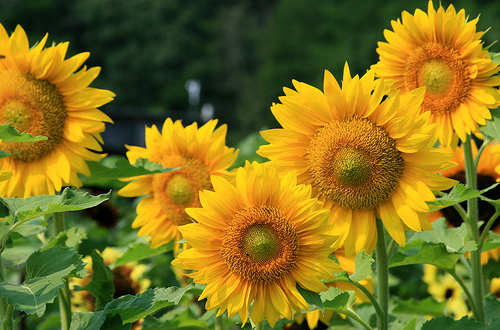

In [58]:
Image.open(flower_dict['sunflowers'][0])         # as you can see this is my first image of sunflower

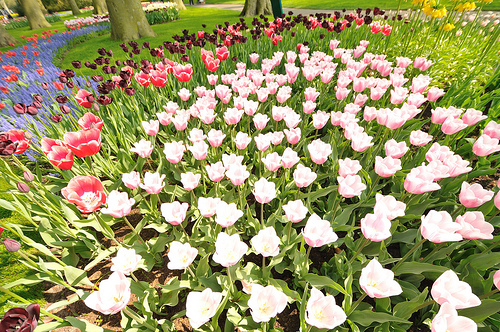

In [63]:
Image.open(flower_dict['tulips'][582])         # as you can see this is my  image of tulips

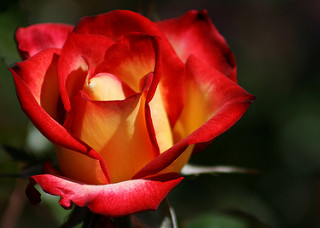

In [64]:
Image.open(flower_dict['roses'][582])         # as you can see this is my  image of roses

# dimension of all the images are different and now i will take in one varialbe all and reduce the size with all images same

In [10]:
x,y = [],[]
for key , valu in flower_dict.items():
    for item in valu:
        img = cv2.imread(str(item))
        reduced_image = cv2.resize(img,(224,224))
        x.append(reduced_image)
        y.append(flower_label[key])
        

In [11]:
x = np.array(x)
y = np.array(y)

# got the independent and dependent variable

In [12]:
x.shape,y.shape

((3670, 224, 224, 3), (3670,))

In [13]:
# train test split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [14]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape      # shape of the all set

((2752, 224, 224, 3), (2752,), (918, 224, 224, 3), (918,))

In [15]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
# preprocess the images

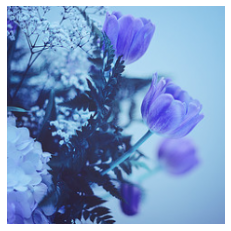

In [86]:
plt.axis('off')       # these images are ready for the training
plt.imshow(x_train_scaled[658])

In [ ]:
# gold_fish[np.newaxis, ...]

In [16]:
predicted = classifier.predict(x_test_scaled)
predicted

29/29 [==============================] - 343s 12s/step


array([[[[5.13645282e-05, 4.10193061e-05, 6.90159068e-05, ...,
          6.71141424e-06, 6.65064654e-05, 3.12740376e-05]]],


       [[[2.86961906e-04, 3.42652405e-04, 4.09421918e-04, ...,
          4.87624930e-05, 1.14583076e-04, 1.77034788e-04]]],


       [[[3.70792637e-04, 1.16128918e-04, 1.19767210e-03, ...,
          1.34745103e-04, 4.46484191e-05, 6.00354804e-04]]],


       ...,


       [[[1.57582093e-04, 2.52955979e-05, 4.07531392e-04, ...,
          2.52704369e-04, 1.71610500e-05, 2.44699622e-04]]],


       [[[2.92381039e-04, 1.40548091e-05, 1.61865915e-04, ...,
          1.63273118e-03, 1.21773746e-05, 1.81729731e-04]]],


       [[[3.79008910e-04, 3.25148139e-05, 1.63019504e-04, ...,
          1.78216185e-04, 2.43924718e-04, 9.22603474e-04]]]],
      dtype=float32)

## without feature vector model will not gives the expected result, as you can see my prediction

In [21]:
output_index_of_label = [np.argmax(index) for index in predicted]
output_index_of_label[0:4]          

[986, 986, 329, 900]

In [27]:
for i in output_index_of_label[0:4]:
    print(labels_of_imagenet[i])       # very bad result, now i will use the feature vector model
    # which cutt-off the last layer as well extract the feature in our training images
    # but this model will not extract any feature, it is trying to classify the new images with trained images.
    # and prediction very bad categories, which are not similar to my category.

mortarboard
mortarboard
West
theater


## feature vector model

In [35]:
num_of_flowers = 5

model = tf.keras.Sequential([
  classifier_with_feature_vector,       
  tf.keras.layers.Dense(num_of_flowers)            
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1, 1, 1408)        9583872   
                                                                 
 dense_1 (Dense)             (None, 1, 1, 5)           7045      
                                                                 
Total params: 9,590,917
Trainable params: 7,045
Non-trainable params: 9,583,872
_________________________________________________________________


In [37]:
# compile the model

model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [40]:

model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Ranjit Singh\AppData\Local\Temp\ipykernel_9804\1399936833.py", line 1, in <cell line: 1>
      history = model.fit(x_train_scaled, y_train, epochs=5,batch_size=20)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 4 3 5 1 1 4 3 3 2 5 4 2 2 1 1 4 2 3 2 3 4 4 1 4 5 5 3 1 3 1 4 3
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_101372]